In [1]:
from DarkMatter import *

from sklearn.neighbors import KernelDensity

from scipy.stats import ks_2samp

dwarf = "segue_1"
events= Likelihood.eventdisplay.readData(dwarf, smoothed=False, rawdata=True)
signal = events[events[:,2] == 1.0]
bkg = events[events[:,2] == 0.0]
binEdges = np.linspace(1.8, 5.6, 100)

Welcome to JupyROOT 6.23/01


In [3]:
bandwidth = np.std(np.log10(bkg[:,0]))*1.06*len(bkg[:,0])**(-1/5.)
kde = KernelDensity(bandwidth=bandwidth, kernel='tophat')
kde.fit(np.log10(bkg[:,0])[:,None])
N_on = len(signal)
p_bkg = []
for i in trange(10000):
    N_off = np.random.poisson(N_on)
    syn_events = 10**kde.sample(N_off)[:,0]
    st, p = ks_2samp(syn_events, bkg[:,0], alternative='two-sided', mode='auto')
    p_bkg.append(p)
    
st, p_sig = ks_2samp(signal[:,0], bkg[:,0], alternative='two-sided', mode='auto')

  0%|          | 0/10000 [00:00<?, ?it/s]

Text(0.5, 0, 'p-value')

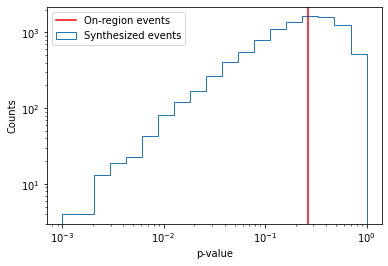

In [4]:
f, ax = plt.subplots(1, 1)

ax.hist(p_bkg, np.logspace(-3, 0, 20), histtype="step", label="Synthesized events")
ax.axvline(p_sig, color="r", label="On-region events")
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend(loc=2)
ax.set_ylabel("Counts")
ax.set_xlabel("p-value")